In [4]:
import os

# 1. Create a directory for the data
if not os.path.exists('data'):
    os.makedirs('data')

# 2. Download the zip file (using a reliable mirror for the NASA dataset)
!#wget https://data.nasa.gov/docs/legacy/CMAPSSData.zip -O data/CMAPSSData.zip

# 3. Unzip it
#!unzip -o data/CMAPSSData.zip -d data/

#print("Data downloaded and extracted!")

In [158]:
# The dataset has 26 columns
# 1. Unit Number (Which engine is it?)
# 2. Time Cycles (How long has it been running?)
# 3-5. Operational Settings (Altitude, Speed, etc.)
# 6-26. Sensor Readings (s1 to s21)

index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1, 22)] 
col_names = index_names + setting_names + sensor_names

print(col_names)

['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


In [159]:
import pandas as pd

data_df = pd.read_csv('data/train_FD001.txt', sep=r'\s+', header=None, names=col_names)

print("Training data shape:", data_df.shape)
data_df.head()

Training data shape: (20631, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [161]:
col_names

['unit_nr',
 'time_cycles',
 'setting_1',
 'setting_2',
 'setting_3',
 's_1',
 's_2',
 's_3',
 's_4',
 's_5',
 's_6',
 's_7',
 's_8',
 's_9',
 's_10',
 's_11',
 's_12',
 's_13',
 's_14',
 's_15',
 's_16',
 's_17',
 's_18',
 's_19',
 's_20',
 's_21']

In [166]:
max_value_cycle = data_df.groupby('unit_nr')['time_cycles'].max()

# Convert Series to DataFrame with a specific column name
max_cycle_df = max_value_cycle.to_frame(name='max_cycle')
max_cycle_df.head()

,max_cycle
unit_nr,
1,192
2,287
3,179
4,189
5,269


In [168]:
data_df = data_df.merge(max_cycle_df, left_on='unit_nr', right_index=True)
data_df.head()       

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


In [181]:
data_df['RUL'] = (
    data_df['max_cycle'] - data_df['time_cycles']
)
data_df.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187


In [182]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [ ]:
#train_df = data_df[setting_names].copy()
#train_df.head(200)

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234
197,2,6,-0.0010,0.0004,100.0,518.67,641.30,1577.50,1396.76,14.62,...,522.80,2387.99,8133.65,8.3800,0.03,392,2388,100.0,39.15,23.4270
198,2,7,0.0001,-0.0002,100.0,518.67,642.03,1587.49,1400.65,14.62,...,522.14,2388.04,8136.33,8.3941,0.03,391,2388,100.0,39.10,23.4718


In [ ]:
#train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [ ]:
from sklearn.preprocessing import MinMaxScaler


not_scaled_cols = ['unit_nr', 'RUL', 'max_cycle']

col_set = set(col_names)
columns_to_scale = [col for col in col_names if col not in not_scaled_cols]

print("Columns to scale:", columns_to_scale)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data_df[columns_to_scale])
scaled_data_df = pd.DataFrame(scaled, columns=columns_to_scale, index=data_df.index)

scaled_data_df.insert(0, 'unit_nr', data_df['unit_nr'])
scaled_data_df.insert(len(scaled_data_df.columns), 'RUL', data_df['RUL'])
scaled_data_df.insert(len(scaled_data_df.columns), 'max_cycle', data_df['max_cycle'])
scaled_data_df.head()


Columns to scale: ['time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,max_cycle
0,1,0.00000,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,192
1,1,0.00277,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,192
2,1,0.00554,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,192
3,1,0.00831,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,192
4,1,0.01108,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,192


In [185]:
#train_df_scaled = pd.DataFrame(scaled_features, columns=columns_to_scale)
#train_df_scaled.head()

In [19]:
import numpy as np

sequence_length = 50

def create_sequences(data, targets, seq_length=50):
    sequences = []
    target_list = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        target = targets[i + seq_length - 1]
        sequences.append(seq)
        target_list.append(target)
    return np.array(sequences), np.array(target_list)


In [186]:
engine_ids = scaled_data_df['unit_nr'].unique()
engine_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [189]:
train_ids = engine_ids[:80]
test_ids = engine_ids[80:]
print("len train ids:", len(train_ids))
print("len test ids:", len(test_ids))
print("len engine ids:", len(engine_ids))

len train ids: 80
len test ids: 20
len engine ids: 100


In [ ]:
#unit_id = engine_ids[0]
#subset = scaled_data_df[scaled_data_df['unit_nr'] == unit_id]
#print(subset.shape)
#subset.head()

(192, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,0.00000,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,0.00277,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,0.00554,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,0.00831,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,0.01108,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [106]:
x_list = []
y_list = []

x_test_list = []
y_test_list = []

for unit_id in train_ids:

    subset = train_df_scaled[train_df_scaled['unit_nr'] == unit_id]
    subset_targets = train_df_merged[train_df_merged['unit_nr'] == unit_id]['RUL'].values
    print("Processing unit id:", unit_id, "with shape:", subset.shape, "and targets shape:", subset_targets.shape)
    
    x,y =create_sequences(subset, subset_targets, seq_length=sequence_length)
    x_list.append(x)
    y_list.append(y)

for unit_id in test_ids:

    subset = train_df_scaled[train_df_scaled['unit_nr'] == unit_id]
    subset_targets = train_df_merged[train_df_merged['unit_nr'] == unit_id]['RUL'].values
    print("Processing unit id:", unit_id, "with shape:", subset.shape, "and targets shape:", subset_targets.shape)
    
    x,y =create_sequences(subset, subset_targets, seq_length=sequence_length)
    x_test_list.append(x)
    y_test_list.append(y)


Processing unit id: 1 with shape: (192, 26) and targets shape: (192,)
Processing unit id: 2 with shape: (287, 26) and targets shape: (287,)
Processing unit id: 3 with shape: (179, 26) and targets shape: (179,)
Processing unit id: 4 with shape: (189, 26) and targets shape: (189,)
Processing unit id: 5 with shape: (269, 26) and targets shape: (269,)
Processing unit id: 6 with shape: (188, 26) and targets shape: (188,)
Processing unit id: 7 with shape: (259, 26) and targets shape: (259,)
Processing unit id: 8 with shape: (150, 26) and targets shape: (150,)
Processing unit id: 9 with shape: (201, 26) and targets shape: (201,)
Processing unit id: 10 with shape: (222, 26) and targets shape: (222,)
Processing unit id: 11 with shape: (240, 26) and targets shape: (240,)
Processing unit id: 12 with shape: (170, 26) and targets shape: (170,)
Processing unit id: 13 with shape: (163, 26) and targets shape: (163,)
Processing unit id: 14 with shape: (180, 26) and targets shape: (180,)
Processing unit

In [ ]:
filtered_X_train = train_df_scaled[train_df_scaled['unit_nr'].isin(train_ids)]
filtered_X_test = train_df_scaled[train_df_scaled['unit_nr'].isin(test_ids)]

filtered_Y_train = train_df_merged[train_df_merged['unit_nr'].isin(train_ids)]
filtered_Y_test = train_df_merged[train_df_merged['unit_nr'].isin(test_ids)]

filtered_Y_test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,max_cycle
16138,81,0.00000,0.212644,0.750000,0.0,0.0,0.250000,0.411380,0.411546,0.0,...,0.179792,0.464025,0.0,0.250000,0.0,0.0,0.565891,0.610743,239,240
16139,81,0.00277,0.632184,0.666667,0.0,0.0,0.433735,0.331589,0.432647,0.0,...,0.208639,0.509427,0.0,0.333333,0.0,0.0,0.596899,0.622756,238,240
16140,81,0.00554,0.471264,0.916667,0.0,0.0,0.403614,0.335295,0.238859,0.0,...,0.205439,0.489804,0.0,0.500000,0.0,0.0,0.697674,0.644573,237,240
16141,81,0.00831,0.494253,0.500000,0.0,0.0,0.361446,0.519948,0.381668,0.0,...,0.227991,0.444017,0.0,0.333333,0.0,0.0,0.488372,0.726871,236,240
16142,81,0.01108,0.637931,0.666667,0.0,0.0,0.662651,0.424024,0.461344,0.0,...,0.202652,0.277799,0.0,0.333333,0.0,0.0,0.697674,0.603286,235,240


In [219]:
train_df = scaled_data_df[scaled_data_df['unit_nr'].isin(train_ids)]
test_df = scaled_data_df[scaled_data_df['unit_nr'].isin(test_ids)]
print("Train df shape:", train_df.shape)
print("Test df shape:", test_df.shape)

train_df.head()

Train df shape: (16138, 28)
Test df shape: (4493, 28)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,max_cycle
0,1,0.00000,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,192
1,1,0.00277,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,192
2,1,0.00554,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,192
3,1,0.00831,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,192
4,1,0.01108,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,192


In [293]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def create_sequences_vectorized(X, y, unit_ids, seq_length=50):
    # 1. Create windows (Batch, Seq, Features)
    X_windows = sliding_window_view(X, window_shape=seq_length, axis=0)
    X_windows = X_windows.transpose(0, 2, 1) # (Batch, Seq, Features)
    
    # 2. Align Targets (End of window)
    y_aligned = y[seq_length-1:]
    
    # 3. Create Mask (Ensure window doesn't cross units)
    unit_ids_start = unit_ids[:-seq_length+1]
    unit_ids_end   = unit_ids[seq_length-1:]
    valid_mask = (unit_ids_start == unit_ids_end)
    
    return X_windows[valid_mask], y_aligned[valid_mask]

# --- Usage ---

# 1. Prepare arrays (Sorted)
filtered_X_train = train_df.sort_values(['unit_nr', 'time_cycles'])
filtered_Y_train = train_df.sort_values(['unit_nr', 'time_cycles'])
filtered_X_test = test_df.sort_values(['unit_nr', 'time_cycles'])
filtered_Y_test = test_df.sort_values(['unit_nr', 'time_cycles'])

# 2. CRITICAL: Drop Target (RUL) and max_cycle from Inputs
# We only want the 24 sensor/setting columns + time_cycle
features_to_drop = ['unit_nr', 'RUL', 'max_cycle', "s_1", "s_5", "s_10", "s_16", "s_18", "s_19"]

X_train_arr = filtered_X_train.drop(columns=features_to_drop).values
y_train_arr = filtered_Y_train['RUL'].values 
train_units = filtered_X_train['unit_nr'].values

X_test_arr = filtered_X_test.drop(columns=features_to_drop).values
y_test_arr = filtered_Y_test['RUL'].values
test_units = filtered_X_test['unit_nr'].values

# 3. Create Sequences
X_train_seq, y_train_seq = create_sequences_vectorized(X_train_arr, y_train_arr, train_units, 50)
X_test_seq, y_test_seq = create_sequences_vectorized(X_test_arr, y_test_arr, test_units, 50)

print(f"Train Input Shape: {X_train_seq.shape}") 
# Expected shape: (N, 50, 24) -> 24 features

Train Input Shape: (12218, 50, 19)


In [294]:
X_train_seq[0]

array([[0.        , 0.45977011, 0.16666667, 0.        , 0.18373494,
        0.40680183, 0.30975692, 1.        , 0.72624799, 0.24242424,
        0.109755  , 0.36904762, 0.63326226, 0.20588235, 0.1996078 ,
        0.36398615, 0.33333333, 0.71317829, 0.7246617 ],
       [0.00277008, 0.6091954 , 0.25      , 0.        , 0.28313253,
        0.4530194 , 0.35263336, 1.        , 0.62801932, 0.21212121,
        0.1002423 , 0.38095238, 0.76545842, 0.27941176, 0.1628135 ,
        0.41131204, 0.33333333, 0.66666667, 0.73101353],
       [0.00554017, 0.25287356, 0.75      , 0.        , 0.34337349,
        0.36952256, 0.37052667, 1.        , 0.71014493, 0.27272727,
        0.14004308, 0.25      , 0.79530917, 0.22058824, 0.17179275,
        0.35744517, 0.16666667, 0.62790698, 0.62137531],
       [0.00831025, 0.54022989, 0.5       , 0.        , 0.34337349,
        0.25615871, 0.33119514, 1.        , 0.74074074, 0.31818182,
        0.12451763, 0.16666667, 0.8891258 , 0.29411765, 0.17488905,
        0.166

In [295]:
import torch


X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32)   

print(f"X_train_tensor.shape: {X_train_tensor.shape}")
print(f"y_train_tensor.shape: {y_train_tensor.shape}")

print(f"X_test_tensor.shape: {X_test_tensor.shape}")
print(f"y_test_tensor.shape: {y_test_tensor.shape}")
print(f"X_test_tensor[0]: {X_test_tensor[0]}")
print(f"y_test_tensor[0]: {y_test_tensor[0]}")

X_train_tensor.shape: torch.Size([12218, 50, 19])
y_train_tensor.shape: torch.Size([12218])
X_test_tensor.shape: torch.Size([3513, 50, 19])
y_test_tensor.shape: torch.Size([3513])
X_test_tensor[0]: tensor([[0.0000, 0.2126, 0.7500, 0.0000, 0.2500, 0.4114, 0.4115, 1.0000, 0.6329,
         0.3030, 0.1739, 0.4048, 0.7249, 0.2353, 0.1798, 0.4640, 0.2500, 0.5659,
         0.6107],
        [0.0028, 0.6322, 0.6667, 0.0000, 0.4337, 0.3316, 0.4326, 1.0000, 0.6200,
         0.2879, 0.1911, 0.3214, 0.7207, 0.2794, 0.2086, 0.5094, 0.3333, 0.5969,
         0.6228],
        [0.0055, 0.4713, 0.9167, 0.0000, 0.4036, 0.3353, 0.2389, 1.0000, 0.5523,
         0.3182, 0.1657, 0.3214, 0.5075, 0.2647, 0.2054, 0.4898, 0.5000, 0.6977,
         0.6446],
        [0.0083, 0.4943, 0.5000, 0.0000, 0.3614, 0.5199, 0.3817, 1.0000, 0.7085,
         0.2121, 0.1562, 0.4405, 0.6375, 0.2353, 0.2280, 0.4440, 0.3333, 0.4884,
         0.7269],
        [0.0111, 0.6379, 0.6667, 0.0000, 0.6627, 0.4240, 0.4613, 1.0000, 0.5878,
 

In [283]:
from torch import nn

class EngineRULPredictor(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_layers=2, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers=num_layers, 
            batch_first=True,
            dropout=dropout
        )

        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        
        # Take the output from the last time step
        last_out = out[:, -1, :]
        
        # Pass it through the linear layer
        final_prediction = self.fc(last_out)
        return final_prediction


In [287]:
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 1. Scale Targets to 0-1 range (Max RUL is approx 300)
max_rul = 300.0 
y_train_scaled = y_train_seq / max_rul

# 2. Convert to Tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
model = EngineRULPredictor(input_size=X_train_tensor.shape[2], hidden_size=100)

model = model.to(device) # Move model to GPU
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

EPOCHS = 300
model.train()

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    out = model(X_train_tensor)
    
    # Loss is calculated on SCALED targets (0-1)
    loss = criterion(out.squeeze(), y_train_tensor)
    
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

Using device: cuda
Epoch 1/300, Loss: 0.093817
Epoch 11/300, Loss: 0.033890
Epoch 21/300, Loss: 0.027514
Epoch 31/300, Loss: 0.015324
Epoch 41/300, Loss: 0.012839
Epoch 51/300, Loss: 0.012032
Epoch 61/300, Loss: 0.011803
Epoch 71/300, Loss: 0.011571
Epoch 81/300, Loss: 0.011380
Epoch 91/300, Loss: 0.011284
Epoch 101/300, Loss: 0.011142
Epoch 111/300, Loss: 0.011101
Epoch 121/300, Loss: 0.011010
Epoch 131/300, Loss: 0.010970
Epoch 141/300, Loss: 0.010929
Epoch 151/300, Loss: 0.010905
Epoch 161/300, Loss: 0.010840
Epoch 171/300, Loss: 0.010815
Epoch 181/300, Loss: 0.010773
Epoch 191/300, Loss: 0.010738
Epoch 201/300, Loss: 0.010730
Epoch 211/300, Loss: 0.010781
Epoch 221/300, Loss: 0.010689
Epoch 231/300, Loss: 0.010653
Epoch 241/300, Loss: 0.010640
Epoch 251/300, Loss: 0.010670
Epoch 261/300, Loss: 0.010679
Epoch 271/300, Loss: 0.010674
Epoch 281/300, Loss: 0.010624
Epoch 291/300, Loss: 0.010586


In [297]:
from torch.utils.data import TensorDataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).to(device)
# 1. Create a DataLoader (This enables Mini-Batching)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 2. Update Model (Make it slightly larger for better accuracy)
model = EngineRULPredictor(input_size=X_train_tensor.shape[2], hidden_size=256, num_layers=2)
model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. Fix Scheduler (Decay less aggressively)
# Decay by 10% every 100 epochs instead of 50% every 50 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)

EPOCHS = 300 # You likely need fewer epochs with mini-batching

model.train()
print("Starting Mini-Batch Training...")

for epoch in range(EPOCHS):
    epoch_loss = 0
    
    # Iterate through batches
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        # Forward pass (Batch only)
        out = model(X_batch)
        loss = criterion(out.squeeze(), y_batch)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Step scheduler once per epoch
    scheduler.step()
    
    if (epoch + 1) % 10 == 0:
        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{EPOCHS}, Avg Loss: {avg_loss:.6f}")

Using device: cuda
Starting Mini-Batch Training...
Epoch 10/300, Avg Loss: 0.007468
Epoch 20/300, Avg Loss: 0.004993
Epoch 30/300, Avg Loss: 0.003700
Epoch 40/300, Avg Loss: 0.002751
Epoch 50/300, Avg Loss: 0.001665
Epoch 60/300, Avg Loss: 0.001458
Epoch 70/300, Avg Loss: 0.000867
Epoch 80/300, Avg Loss: 0.000352
Epoch 90/300, Avg Loss: 0.000498
Epoch 100/300, Avg Loss: 0.000195
Epoch 110/300, Avg Loss: 0.000108
Epoch 120/300, Avg Loss: 0.001040
Epoch 130/300, Avg Loss: 0.000083
Epoch 140/300, Avg Loss: 0.000065


KeyboardInterrupt: 

In [ ]:
import copy

# 1. Add Dropout to the Model
class EngineRULPredictor(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.3):
        super().__init__()
        # Dropout only works if num_layers > 1
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers=num_layers, 
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]
        return self.fc(last_out)

# 2. Setup (Reduced hidden size slightly to 128 to prevent overfitting)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EngineRULPredictor(input_size=X_train_tensor.shape[2], hidden_size=128, num_layers=2, dropout=0.3)
model = model.to(device)

criterion = nn.MSELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

# 3. Training with "Save Best" logic
EPOCHS = 150  # Lower epochs, let early stopping do the work
best_test_rmse = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())

# Move validation data to GPU once
X_test_gpu = X_test_tensor.to(device)
y_test_real = y_test_seq # Keep real values for RMSE calculation

print("Starting Training with Validation...")

for epoch in range(EPOCHS):
    model.train() # Set to training mode (enables Dropout)
    epoch_loss = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    # --- Validation Step ---
    model.eval() # Set to eval mode (disables Dropout)
    with torch.no_grad():
        # Get predictions
        preds_scaled = model(X_test_gpu).cpu().numpy().flatten()
        # Unscale
        preds_real = preds_scaled * max_rul
        # Calculate true RMSE
        mse = mean_squared_error(y_test_real, preds_real)
        current_rmse = np.sqrt(mse)
        scheduler.step(current_rmse)
    
    # Save model if it's the best so far
    if current_rmse < best_test_rmse:
        best_test_rmse = current_rmse
        best_model_wts = copy.deepcopy(model.state_dict())
        print(f"Epoch {epoch+1}: New Best RMSE: {current_rmse:.2f}")
    
    if (epoch + 1) % 10 == 0:
        avg_train_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}: Train Loss {avg_train_loss:.6f} | Test RMSE {current_rmse:.2f}")

# 4. Load the best weights back
print(f"Training complete. Best RMSE: {best_test_rmse:.2f}")
model.load_state_dict(best_model_wts)

Starting Training with Validation...
Epoch 1: New Best RMSE: 48.13
Epoch 2: New Best RMSE: 46.70
Epoch 3: New Best RMSE: 44.40
Epoch 4: New Best RMSE: 39.80
Epoch 6: New Best RMSE: 35.79
Epoch 7: New Best RMSE: 34.02
Epoch 8: New Best RMSE: 31.41
Epoch 9: New Best RMSE: 28.71
Epoch 10: Train Loss 0.005744 | Test RMSE 38.32
Epoch 20: Train Loss 0.005049 | Test RMSE 30.94
Epoch 30: Train Loss 0.004031 | Test RMSE 33.93
Epoch 40: Train Loss 0.003714 | Test RMSE 32.96
Epoch 50: Train Loss 0.002417 | Test RMSE 34.68
Epoch 60: Train Loss 0.001994 | Test RMSE 33.83
Epoch 70: Train Loss 0.004916 | Test RMSE 30.56
Epoch 80: Train Loss 0.001138 | Test RMSE 34.76
Epoch 90: Train Loss 0.002672 | Test RMSE 30.59
Epoch 100: Train Loss 0.000897 | Test RMSE 34.46
Epoch 110: Train Loss 0.002160 | Test RMSE 34.55
Epoch 120: Train Loss 0.000587 | Test RMSE 36.05
Epoch 130: Train Loss 0.000423 | Test RMSE 37.75
Epoch 140: Train Loss 0.002002 | Test RMSE 31.48
Epoch 150: Train Loss 0.001286 | Test RMSE 29.

<All keys matched successfully>

Test RMSE: 28.85


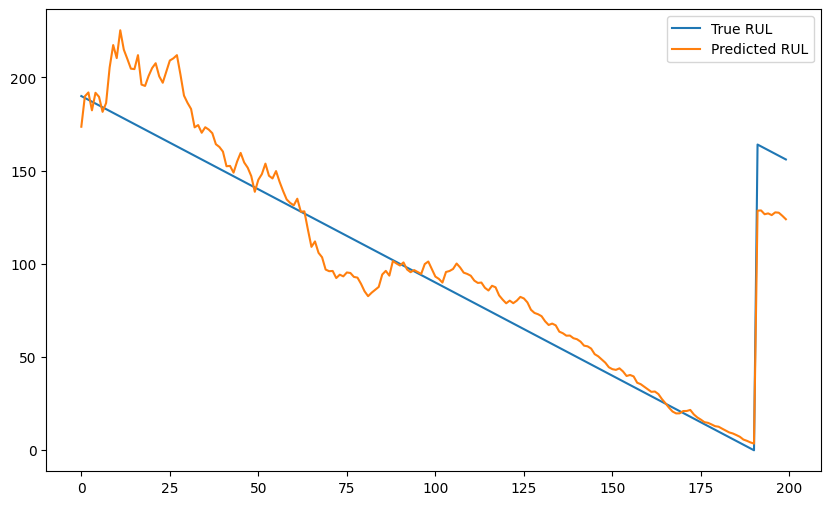

In [291]:
X_test_tensor = X_test_tensor.to("cpu")
y_test_tensor = y_test_tensor.to("cpu")
model.to("cpu")

#X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
# y_test_seq is the original TRUE RUL (not scaled)

model.eval()
with torch.no_grad():
    # Predict (Output is 0-1)
    preds_scaled = model(X_test_tensor)
    # Un-scale (Output becomes 0-300)
    preds_real = preds_scaled.cpu().numpy().flatten() * max_rul

# Calculate RMSE on real values
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_seq, preds_real)
print(f"Test RMSE: {np.sqrt(mse):.2f}")

from matplotlib import pyplot as plt

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_seq[:200], label='True RUL')
plt.plot(preds_real[:200], label='Predicted RUL')
plt.legend()
plt.show()

In [280]:
import torch
print(f'Torch version: {torch.__version__}')
print(f'CUDA available: {torch.cuda.is_available()}')
print(f'CUDA device count: {torch.cuda.device_count()}')
if torch.cuda.is_available():
    print(f'Active device: {torch.cuda.get_device_name(torch.cuda.current_device())}')
else:
    print('No CUDA devices detected.')

Torch version: 2.9.1+cu128
CUDA available: True
CUDA device count: 1
Active device: NVIDIA GeForce RTX 5060 Ti


In [32]:
import torch
if not torch.cuda.is_available():
    raise SystemExit('CUDA is not available; skipping tensor test.')
device = torch.device('cuda')
x = torch.randn(1000, 1000, device=device)
y = torch.randn(1000, 1000, device=device)
z = torch.matmul(x, y)
print(f'Result tensor device: {z.device}')
print(f'Result sample: {z.flatten()[0].item():.6f}')

Result tensor device: cuda:0
Result sample: 3.887904
